In [0]:
display(dbutils.fs.ls("/databricks-datasets"))

path,name,size,modificationTime
dbfs:/databricks-datasets/,databricks-datasets/,0,0
dbfs:/databricks-datasets/COVID/,COVID/,0,0
dbfs:/databricks-datasets/README.md,README.md,976,1532468253000
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0,0
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359,1455043490000
dbfs:/databricks-datasets/adult/,adult/,0,0
dbfs:/databricks-datasets/airlines/,airlines/,0,0
dbfs:/databricks-datasets/amazon/,amazon/,0,0
dbfs:/databricks-datasets/asa/,asa/,0,0
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0,0


In [0]:
%fs ls databricks-datasets/adult/adult.data

path,name,size,modificationTime
dbfs:/databricks-datasets/adult/adult.data,adult.data,3974305,1444260537000


In [0]:
%sql 
-- drop the table if it already exists
DROP TABLE IF EXISTS adult

In [0]:
%sql
-- create a new table in Spark SQL from the datasets already loaded in the underlying filesystem.
CREATE TABLE adult (
  age DOUBLE,
  workclass STRING,
  fnlwgt DOUBLE,
  education STRING,
  education_num DOUBLE,
  marital_status STRING,
  occupation STRING,
  relationship STRING,
  race STRING,
  sex STRING,
  capital_gain DOUBLE,
  capital_loss DOUBLE,
  hours_per_week DOUBLE,
  native_country STRING,
  income STRING)
USING com.databricks.spark.csv
OPTIONS (path "/databricks-datasets/adult/adult.data", header "true")

In [0]:
display(spark.sql("SELECT * FROM adult LIMIT 5"))

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [0]:
# summary marital status rates by occupation
result = spark.sql(
  """
  SELECT 
    occupation,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) LIKE 'Married-%',1,0)),2) as married_rate,
    ROUND(AVG(if(lower(marital_status) LIKE '%widow%',1,0)),2) as widow_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Divorced',1,0)),2) as divorce_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Separated',1,0)),2) as separated_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY n DESC
  """)
display(result)

occupation,n,married_rate,widow_rate,divorce_rate,separated_rate,bachelor_rate
Prof-specialty,4140,0.53,0.02,0.13,0.02,0.3
Craft-repair,4099,0.64,0.01,0.11,0.03,0.21
Exec-managerial,4066,0.61,0.02,0.15,0.02,0.2
Adm-clerical,3769,0.28,0.04,0.22,0.04,0.42
Sales,3650,0.47,0.03,0.12,0.03,0.36
Other-service,3295,0.24,0.05,0.15,0.06,0.5
Machine-op-inspct,2002,0.51,0.03,0.14,0.04,0.29
?,1843,0.36,0.08,0.1,0.04,0.42
Transport-moving,1597,0.63,0.02,0.11,0.02,0.21
Handlers-cleaners,1370,0.36,0.01,0.09,0.03,0.51


In [0]:
# register the df we just made as a table for spark sql
sqlContext.registerDataFrameAsTable(result, "result")
spark.sql("SELECT * FROM result").show(5)

+----------------+----+------------+----------+------------+--------------+-------------+
|      occupation|   n|married_rate|widow_rate|divorce_rate|separated_rate|bachelor_rate|
+----------------+----+------------+----------+------------+--------------+-------------+
|  Prof-specialty|4140|        0.53|      0.02|        0.13|          0.02|          0.3|
|    Craft-repair|4099|        0.64|      0.01|        0.11|          0.03|         0.21|
| Exec-managerial|4066|        0.61|      0.02|        0.15|          0.02|          0.2|
|    Adm-clerical|3769|        0.28|      0.04|        0.22|          0.04|         0.42|
|           Sales|3650|        0.47|      0.03|        0.12|          0.03|         0.36|
+----------------+----+------------+----------+------------+--------------+-------------+
only showing top 5 rows



In [0]:
# summary marital status rates by occupation
result = spark.sql(
  """
  SELECT 
    education,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY bachelor_rate DESC
  LIMIT 1
  """)
display(result)
result.show()

education,bachelor_rate
12th,0.54


+---------+-------------+
|education|bachelor_rate|
+---------+-------------+
|     12th|         0.54|
+---------+-------------+



In [0]:
#  df from the sql df
df_adult = spark.table("adult")
cols = df_adult.columns # this will be used much later in the notebook, ignore for now

In [0]:
df_adult.printSchema()

root
 |-- age: double (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: double (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [0]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['occupation'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Divorced' , 1 ).otherwise(0).alias('is_divorced')
)
# do grouping (and a round)
df_result = df_result.groupBy('occupation').agg(round(mean('is_divorced'),2).alias('divorced_rate'))
# do ordering
df_result = df_result.orderBy(desc('divorced_rate'))
# show results
df_result.show(5)

+----------------+-------------+
|      occupation|divorced_rate|
+----------------+-------------+
|    Adm-clerical|         0.22|
| Priv-house-serv|         0.19|
| Exec-managerial|         0.15|
|    Tech-support|         0.15|
|   Other-service|         0.15|
+----------------+-------------+
only showing top 5 rows



In [0]:
# top 'bachelor_rate' by 'education' group using DataFrame 
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['education'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Never-married' , 1 ).otherwise(0).alias('bachelor_rate')
)
# do grouping (and a round)
df_result = df_result.groupBy('education').agg(round(mean('bachelor_rate'),2).alias('bachelor_rate'))
# do ordering
df_result = df_result.orderBy(desc('bachelor_rate'))
# show results

In [0]:

import pandas as pd

# do some analysis
result = spark.sql(
  """
  SELECT 
    occupation,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)


df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas.head())

         occupation  plus_50k
0   Exec-managerial  0.484014
1    Prof-specialty  0.449034
2   Protective-serv  0.325116
3      Tech-support  0.304957
4             Sales  0.269315


In [0]:
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   occupation  15 non-null     object 
 1   plus_50k    15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes
None


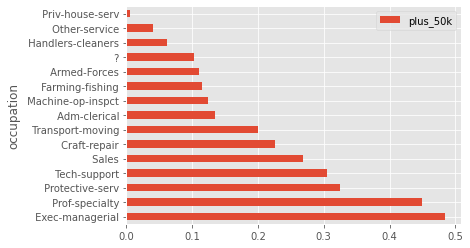

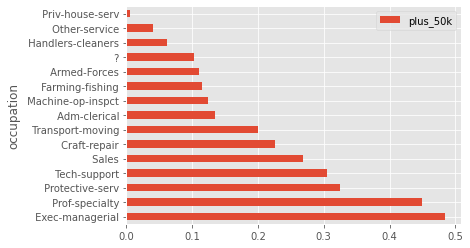

In [0]:
import matplotlib.pyplot as plt

# i like ggplot style
plt.style.use('ggplot')

myplot = df_pandas.plot(kind='barh', x='occupation', y='plus_50k')

display(myplot.figure)

In [0]:

import pandas as pd

# do some analysis
result = spark.sql(
  """
  SELECT 
    age,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

# collect results into a pandas df
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas.head())

    age  plus_50k
0  50.0  0.433555
1  54.0  0.416867
2  79.0  0.409091
3  53.0  0.407328
4  47.0  0.406780


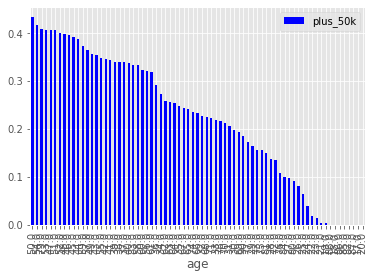

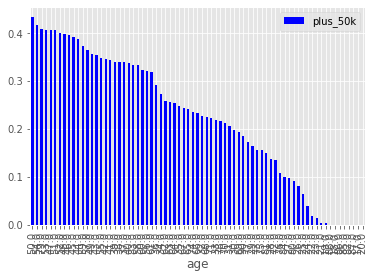

In [0]:


import matplotlib.pyplot as plt
plt.style.use('ggplot')

myplot = df_pandas.plot(kind='bar', x='age', y='plus_50k',color='blue')
display(myplot.figure)

In [0]:
# describe df
df_adult.select(df_adult['age'],df_adult['education_num']).describe().show()

+-------+------------------+------------------+
|summary|               age|     education_num|
+-------+------------------+------------------+
|  count|             32560|             32560|
|   mean|38.581633906633904| 10.08058968058968|
| stddev|13.640641827464002|2.5727089681052058|
|    min|              17.0|               1.0|
|    max|              90.0|              16.0|
+-------+------------------+------------------+



In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder , StringIndexer, VectorAssembler

categoricalColumns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
stages = [] # stages in our Pipeline

for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]


In [0]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="income", outputCol="label")
stages += [label_stringIdx]

In [0]:
# Transform all features into a vector using VectorAssembler
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
# Run the feature transformations.
#  - fit() computes feature statistics as needed.
#  - transform() actually transforms the features.
pipelineModel = pipeline.fit(df_adult)
dataset = pipelineModel.transform(df_adult)
# Keep relevant columns
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset)

label,features,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(1, 10, 23, 31, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 83311.0, 13.0, 13.0))",50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 25, 38, 44, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 38.0, 215646.0, 9.0, 40.0))",38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 13, 23, 38, 43, 49, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 53.0, 234721.0, 7.0, 40.0))",53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 10, 23, 29, 47, 49, 62, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 28.0, 338409.0, 13.0, 40.0))",28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 11, 23, 31, 47, 48, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 284582.0, 14.0, 40.0))",37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
0.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 18, 28, 34, 44, 49, 64, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 49.0, 160187.0, 5.0, 16.0))",49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
1.0,"Map(vectorType -> sparse, length -> 100, indices -> List(1, 8, 23, 31, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 52.0, 209642.0, 9.0, 45.0))",52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
1.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 11, 24, 29, 44, 48, 53, 94, 95, 96, 97, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 31.0, 45781.0, 14.0, 14084.0, 50.0))",31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
1.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 10, 23, 31, 43, 48, 52, 53, 94, 95, 96, 97, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 42.0, 159449.0, 13.0, 5178.0, 40.0))",42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
1.0,"Map(vectorType -> sparse, length -> 100, indices -> List(0, 9, 23, 31, 43, 49, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 280464.0, 10.0, 80.0))",37.0,Private,280464.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K


In [0]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)
print(trainingData.count())
print(testData.count())

22831
9729


In [0]:
from pyspark.sql.functions import avg

# get the rate of the positive outcome from the training data to use as a threshold in the model
training_data_positive_rate = trainingData.select(avg(trainingData['label'])).collect()[0][0] 

print("Positive rate in the training data is {}".format(training_data_positive_rate))

Positive rate in the training data is 0.2398931277648811


In [0]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# set threshold for the probability above which to predict a 1
lr.setThreshold(training_data_positive_rate)
# lr.setThreshold(0.5) # could use this if knew you had balanced data

# Train model with Training Data
lrModel = lr.fit(trainingData)

# get training summary used for eval metrics and other params
lrTrainingSummary = lrModel.summary
print(lrTrainingSummary)

In [0]:
fMeasure = lrTrainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
lrBestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
  
print("Best threshold based on model performance on training data is {}".format(lrBestThreshold))

Best threshold based on model performance on training data is 0.3178139130754516


In [0]:
lrPredictions = lrModel.transform(testData)

# display predictions
display(lrPredictions.select("label", "prediction", "probability"))

label,prediction,probability
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.1602132525712759, 0.8397867474287242))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.7013547171086596, 0.2986452828913404))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5284674080969827, 0.47153259190301733))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.6757968481659136, 0.32420315183408643))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.620038493322546, 0.379961506677454))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.607404569017195, 0.392595430982805))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5992215790962835, 0.4007784209037165))"
0.0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.6005993083321799, 0.3994006916678201))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.7653647088732483, 0.23463529112675174))"
0.0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9909542200665854, 0.0090457799334146))"


In [0]:

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

def print_performance_metrics(predictions):
  # Evaluate model
  evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
  auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
  aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
  print("auc = {}".format(auc))
  print("aupr = {}".format(aupr))

  # get rdd of predictions and labels for mllib eval metrics
  predictionAndLabels = predictions.select("prediction","label").rdd

  # Instantiate metrics objects
  binary_metrics = BinaryClassificationMetrics(predictionAndLabels)
  multi_metrics = MulticlassMetrics(predictionAndLabels)

  # Area under precision-recall curve
  print("Area under PR = {}".format(binary_metrics.areaUnderPR))
  # Area under ROC curve
  print("Area under ROC = {}".format(binary_metrics.areaUnderROC))
  # Accuracy
  print("Accuracy = {}".format(multi_metrics.accuracy))
  # Confusion Matrix
  print(multi_metrics.confusionMatrix())
  
  
  # F1
  print("F1 = {}".format(multi_metrics.fMeasure(0.0)))
  # Precision
  print("Precision = {}".format(multi_metrics.precision(0.0)))
  # Recall
  print("Recall = {}".format(multi_metrics.recall(0.0)))
  # FPR
  print("FPR = {}".format(multi_metrics.falsePositiveRate(0.0)))
  # TPR
  print("TPR = {}".format(multi_metrics.truePositiveRate(0.0)))
  
  
print_performance_metrics(lrPredictions)

auc = 0.9022382581905842
aupr = 0.7639327846135503
/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
Area under PR = 0.550904296478963
Area under ROC = 0.8214764233357801
Accuracy = 0.8119025593586185
DenseMatrix([[5913., 1452.],
             [ 378., 1986.]])
F1 = 0.8659929701230228
Precision = 0.9399141630901288
Recall = 0.8028513238289205
FPR = 0.1598984771573604
TPR = 0.8028513238289205
